<a href="https://colab.research.google.com/github/shum05/ML_Wine_Quality_prediction/blob/main/WineQualityPrediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Red Wine Quality Prediction Using ML Algorithms**

## **1. Set up Environment**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path='drive/My Drive/PGP_DS_CarEra_LiveClass/WineQualityPrediction_ML'

In [ ]:
data=pd.read_csv(path+'/winequality-red.csv')

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

## **3. Some info about the ds**

### Input variables (based on physicochemical tests):
1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
### Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)



In [ ]:
data["quality"].sort_values().unique()


array([3, 4, 5, 6, 7, 8])

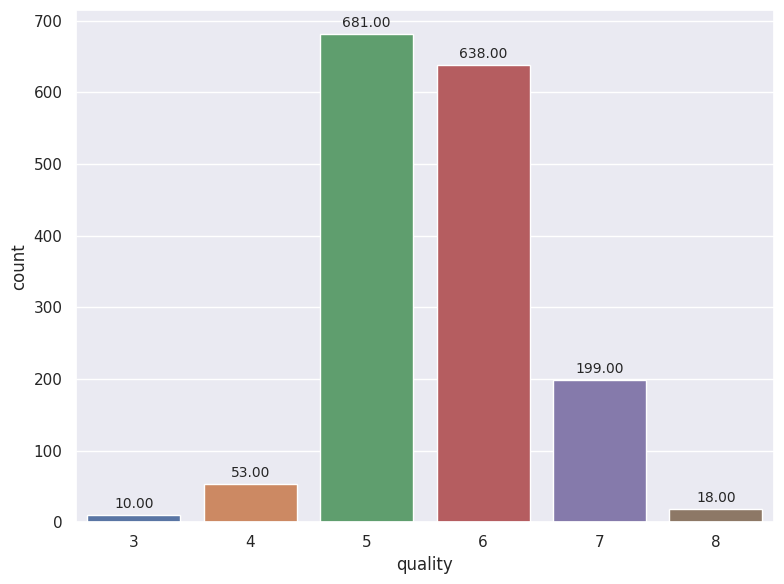

In [ ]:
plt.figure(figsize=(8, 6))
plots=sns.countplot(data=data, x=data["quality"])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

## **4. Quality Vs Other features Analysis**

In [ ]:
data.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


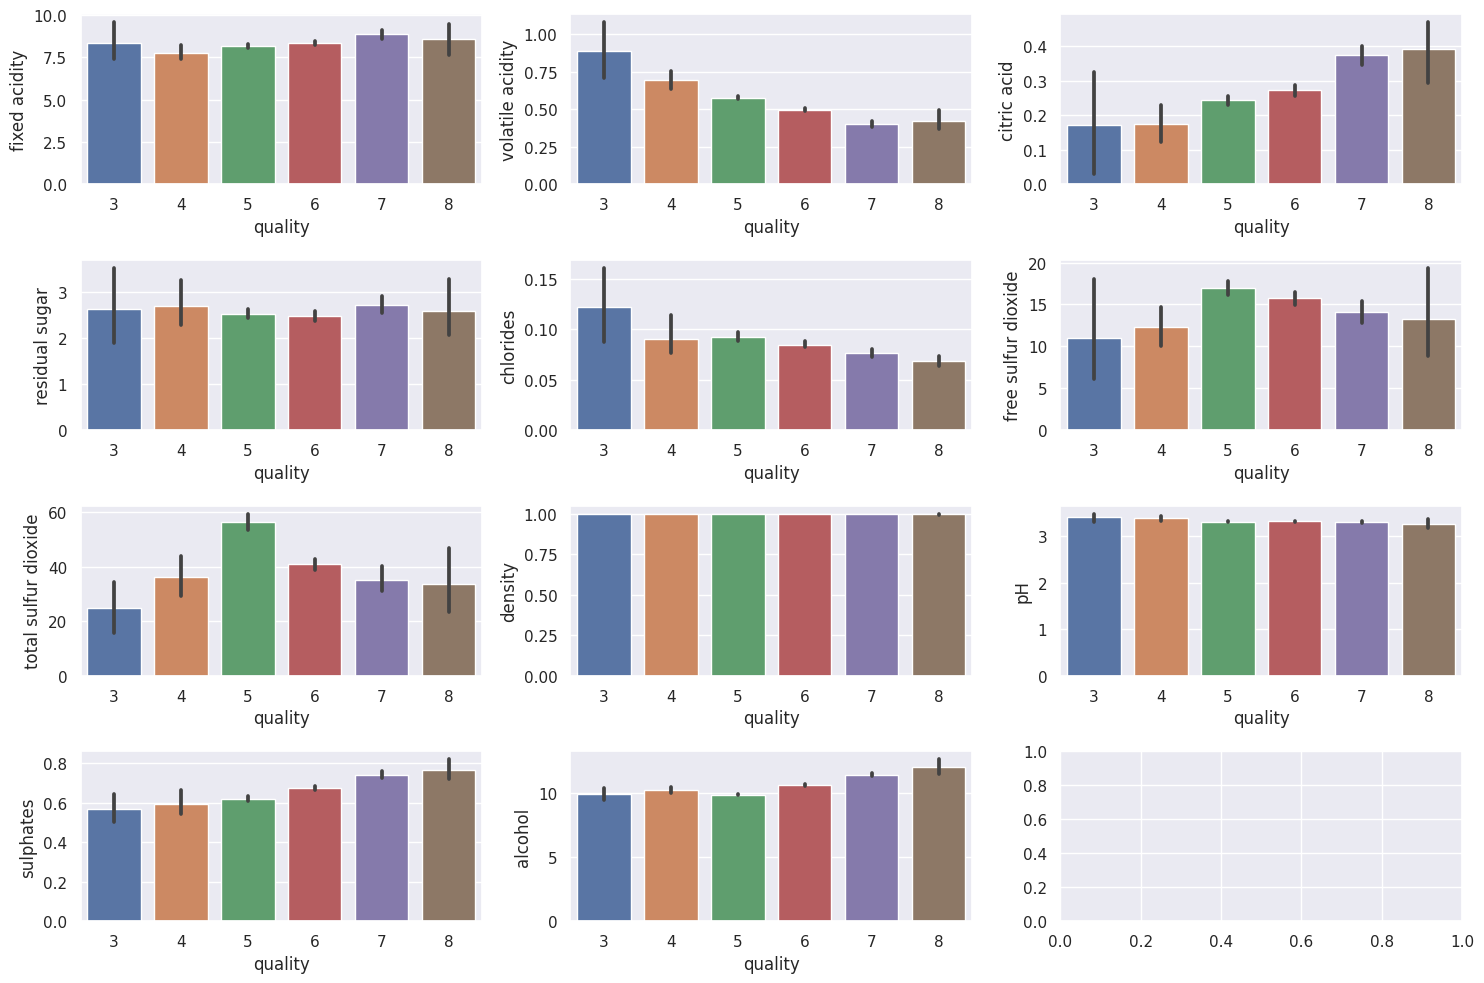

In [ ]:
fig, axes = plt.subplots(4, 3)
#fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = False
sns.barplot(x=data["quality"], y=data["fixed acidity"], data=data, ax=axes[0,0])
sns.barplot(x=data["quality"], y=data["volatile acidity"], data=data, ax=axes[0,1])
sns.barplot(x=data["quality"], y=data["citric acid"], data=data, ax=axes[0,2])
sns.barplot(x=data["quality"], y=data["residual sugar"],data=data, ax=axes[1,0])
sns.barplot(x=data["quality"], y=data["chlorides"],data=data, ax=axes[1,1])
sns.barplot(x=data["quality"], y=data["free sulfur dioxide"],data=data, ax=axes[1,2])
sns.barplot(x=data["quality"], y=data["total sulfur dioxide"],data=data, ax=axes[2,0])
sns.barplot(x=data["quality"], y=data["density"],data=data, ax=axes[2,1])
sns.barplot(x=data["quality"], y=data["pH"],data=data, ax=axes[2,2])
sns.barplot(x=data["quality"], y=data["sulphates"], data=data, ax=axes[3,0])
sns.barplot(x=data["quality"], y=data["alcohol"],data=data, ax=axes[3,1])

plt.show()

### Correlation Matrix to see more insights

<Axes: >

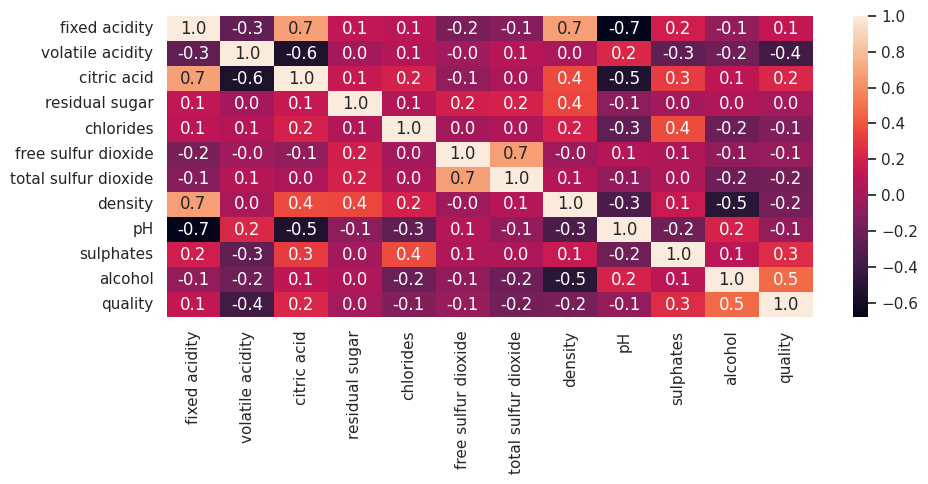

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, fmt='0.1f')

## **5. Binerization of Target Variable**

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
label_quality = LabelEncoder()   # Use LabelEncoder when there are only two possible values of a categorical features,  Encode target labels with value between 0 and n_classes-1

In [ ]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [ ]:
data["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## **Storing feature and target variables in X and y rspctvly**

In [ ]:
X=data.drop("quality", axis=1)
y=data["quality"]

## **Handling Imbalanced Dataset**
let's use SMOTe oversampling==> SMOTE- stands for Synthetic Minority Oversampling Technique

In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
X_resampled, y_resampled =SMOTE().fit_resample(X,y)

In [ ]:
y_resampled.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y.unique()

array([0, 1])

## **Split Dataset int train and test data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,  y_test=train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2750,8.761312,0.311290,0.319679,1.977421,0.064564,11.887104,25.000000,0.995198,3.278063,0.828710,11.519366
1849,7.200000,0.377438,0.312562,2.000000,0.057537,15.000000,28.743755,0.994715,3.230000,0.752313,11.300000
651,9.800000,0.880000,0.250000,2.500000,0.104000,35.000000,155.000000,1.001000,3.410000,0.670000,11.200000
261,7.000000,0.975000,0.040000,2.000000,0.087000,12.000000,67.000000,0.995650,3.350000,0.600000,9.400000
1253,7.900000,0.660000,0.000000,1.400000,0.096000,6.000000,13.000000,0.995690,3.430000,0.580000,9.500000
...,...,...,...,...,...,...,...,...,...,...,...
1638,9.450596,0.466403,0.344032,2.326877,0.089834,10.134386,44.462456,0.998069,3.277628,0.626877,10.062842
1095,9.400000,0.400000,0.470000,2.500000,0.087000,6.000000,20.000000,0.997720,3.150000,0.500000,10.500000
1130,9.100000,0.600000,0.000000,1.900000,0.058000,5.000000,10.000000,0.997700,3.180000,0.630000,10.400000
1294,8.200000,0.635000,0.100000,2.100000,0.073000,25.000000,60.000000,0.996380,3.290000,0.750000,10.900000


In [ ]:
X_train.shape

(2211, 11)

In [ ]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1988,7.484656,0.439761,0.203258,1.784025,0.064083,5.420126,25.739621,0.995165,3.406151,0.924025,11.827798
1216,7.900000,0.570000,0.310000,2.000000,0.079000,10.000000,79.000000,0.996770,3.290000,0.690000,9.500000
1385,8.000000,0.810000,0.250000,3.400000,0.076000,34.000000,85.000000,0.996680,3.190000,0.420000,9.200000
2562,8.014333,0.629993,0.180005,1.957131,0.058571,31.571414,47.571414,0.995869,3.408568,0.671432,11.571404
1334,7.200000,0.835000,0.000000,2.000000,0.166000,4.000000,11.000000,0.996080,3.390000,0.520000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...
2330,8.811261,0.359022,0.420751,4.665415,0.068488,3.000000,9.345846,0.997038,3.341957,0.653083,11.807508
1694,7.779891,0.489229,0.366143,2.155372,0.067722,30.815426,53.630853,0.997247,3.279697,0.670303,10.295318
100,8.300000,0.610000,0.300000,2.100000,0.084000,11.000000,50.000000,0.997200,3.400000,0.610000,10.200000
315,7.100000,0.350000,0.290000,2.500000,0.096000,20.000000,53.000000,0.996200,3.420000,0.650000,11.000000


## **Feature scaling --for algorithms that calculate  distance bn data points**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()

In [ ]:
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

## **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=0.95) # we can also give as no of features as n_components=8 0r 7

In [ ]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_  # Percentage of variance explained by each of the selected components.

# If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

array([0.29252912, 0.18764168, 0.1458158 , 0.10330073, 0.08468674,
       0.05786932, 0.04680744, 0.0347633 ])

In [ ]:
sum(pca.explained_variance_ratio_ )

0.9534141321006654

## **Model Selections**
As the problem is a classification problem, we will use different classification algors and compare

### A. Logistic regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_log=log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score

In [ ]:
acc_sc=accuracy_score(y_test, y_pred_log)
prec_sc=precision_score(y_test, y_pred_log)
rec_sc=recall_score(y_test, y_pred_log)
f1_sc=f1_score(y_test, y_pred_log)
print(acc_sc, prec_sc, + rec_sc,f1_sc)

0.8191681735985533 0.7773972602739726 0.8664122137404581 0.8194945848375452


### B. SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc= SVC()

In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svc=svc.predict(X_test, )

In [ ]:
acc_sc=accuracy_score(y_test, y_pred_svc)
prec_sc=precision_score(y_test, y_pred_svc)
rec_sc=recall_score(y_test, y_pred_svc)
f1_sc=f1_score(y_test, y_pred_svc)
print(acc_sc, prec_sc, + rec_sc,f1_sc)

0.8842676311030742 0.8344594594594594 0.9427480916030534 0.8853046594982079


### C. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn= KNeighborsClassifier()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
acc_sc=accuracy_score(y_test, y_pred_knn)
prec_sc=precision_score(y_test, y_pred_knn)
rec_sc=recall_score(y_test, y_pred_knn)
f1_sc=f1_score(y_test, y_pred_knn)
print(acc_sc, prec_sc, + rec_sc,f1_sc)

0.8770343580470162 0.7993827160493827 0.9885496183206107 0.8839590443686006


### D. DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc= dtc.predict(X_test)

In [ ]:
acc_sc=accuracy_score(y_test, y_pred_dtc)
prec_sc=precision_score(y_test, y_pred_dtc)
rec_sc=recall_score(y_test, y_pred_dtc)
f1_sc=f1_score(y_test, y_pred_dtc)
print(acc_sc, prec_sc, + rec_sc,f1_sc)

0.8788426763110307 0.8327645051194539 0.9312977099236641 0.8792792792792793


### E. RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc= RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc= rfc.predict(X_test)

In [ ]:
acc_sc=accuracy_score(y_test, y_pred_rfc)
prec_sc=precision_score(y_test, y_pred_rfc)
rec_sc=recall_score(y_test, y_pred_rfc)
f1_sc=f1_score(y_test, y_pred_rfc)
print(acc_sc, prec_sc, + rec_sc,f1_sc)

0.9258589511754068 0.8850174216027874 0.9694656488549618 0.9253187613843351


### F. Gradient Boosting Classiefier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc= GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_gbc=gbc.predict(X_test)

In [ ]:
acc_sc=accuracy_score(y_test, y_pred_gbc)
prec_sc=precision_score(y_test, y_pred_gbc)
rec_sc=recall_score(y_test, y_pred_gbc)
f1_sc=f1_score(y_test, y_pred_gbc)
print(acc_sc, prec_sc, + rec_sc,f1_sc)

0.8860759493670886 0.8515901060070671 0.9198473282442748 0.8844036697247706


In [ ]:
model_compar= pd.DataFrame({'models':["LogReg","SVC", "KNN", "DTC", "RFC","GBC"],
                           'accuracy':[accuracy_score(y_test, y_pred_log)*100,
                                      accuracy_score(y_test, y_pred_svc)*100,
                                      accuracy_score(y_test, y_pred_knn)*100,
                                      accuracy_score(y_test, y_pred_dtc)*100,
                                      accuracy_score(y_test, y_pred_rfc)*100,
                                      accuracy_score(y_test, y_pred_gbc)*100]})

In [ ]:
model_compar

,models,accuracy
0,LogReg,81.916817
1,SVC,88.426763
2,KNN,87.703436
3,DTC,87.884268
4,RFC,92.585895
5,GBC,88.607595


In [ ]:
import seaborn as sns

<Axes: xlabel='models', ylabel='accuracy'>

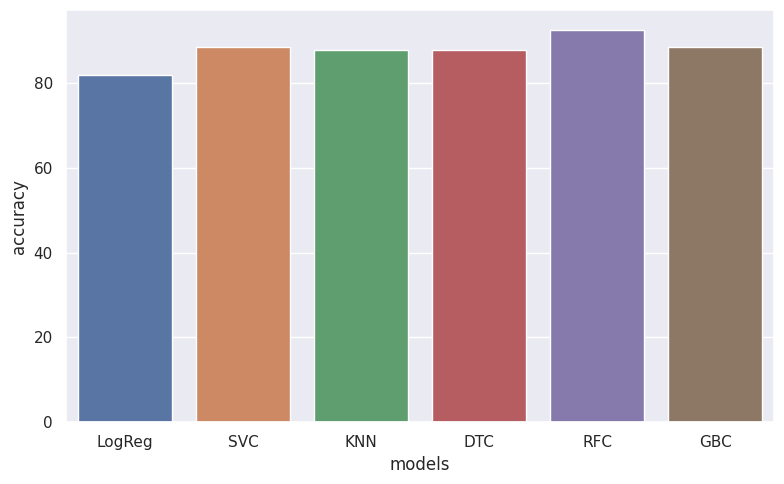

In [ ]:
sns.set(rc={"figure.figsize":(8, 5)})
sns.barplot(x=model_compar['models'], y=model_compar['accuracy'])

Result: RF is the best model for this dataset

## **Save theb Best Model-GradientBoostingClassifier**

In [ ]:
X= data.drop('quality', axis=1)
y=data['quality']

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled,y_resampled= SMOTE().fit_resample(X,y)

In [ ]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
X=st.fit_transform(X_resampled)

In [ ]:
X=pca.fit_transform(X)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rfc= RandomForestClassifier()
rfc.fit(X,y_resampled)

RandomForestClassifier()

In [ ]:
import joblib # Joblib is a set of tools to provide lightweight pipelining in Python. In particular:

In [ ]:
joblib.dump(rfc, 'red_wine_quality_prediction')

['red_wine_quality_prediction']

In [ ]:
new_model=joblib.load('red_wine_quality_prediction')

In [ ]:
new_data=pd.DataFrame({'fixed acidity':7.3,
                      'volatile acidity' :0.65,
                      'citric acid':   0.0,
                      'residual sugar': 1.2,
                      'chlorides':0.065,
                      'free sulfur dioxide': 15.0,
                      'total sulfur dioxide':21.0,
                      'density': 0.9946,
                      'pH':3.39,
                      'sulphates': 0.47,
                      'alcohol': 10.0},index=[0])

In [ ]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [ ]:
test=pca.transform(st.transform(new_data))

In [ ]:
pred= new_model.predict(test)

In [ ]:
if pred[0]==1:
  print("GOOD Quality Red Wine!!!!")
else:
  print("POOR Quality Red Wine!!!!")

GOOD Quality Red Wine!!!!


# **GUI** using tkinter

Tkinter is the de facto way in Python to create Graphical User interfaces (GUIs)

In [ ]:
from tkinter import *
import joblib

In [ ]:
import matplotlib
matplotlib.use('Agg')

In [ ]:
#!apt-get install -y xvfb # Install X Virtual Frame Buffer
#import os
#os.system('Xvfb :1 -screen 0 1600x1200x16  &')  # start it
#os.environ['DISPLAY']=':1.0'  # tells X clients where to connect to

In [ ]:
def show_data_entry_form():
  p1=float(e1.get())
  p2=float(e2.get())
  p3=float(e3.get())
  p4=float(e4.get())
  p5=float(e5.get())
  p6=float(e6.get())
  p7=float(e7.get())
  p8=float(e8.get())
  p9=float(e9.get())
  p10=float(e10.get())
  p11=float(e11.get())
  model=joblib.load('red_wine_quality_prediction')
  result= model.predict(pca.transform(st.transform([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11]])))
  if result==1:
    Label(master, text="Good Quality Red Wine").grid(row=12)
  else:
    Label(master, text="Poor Quality Red Wine").grid(row=12)


master=Tk()
master.title("Red Wine Quality Prediction")
label= Label(master, text="Red Wine Quality Prediction", bg="black", fg="white").grid(row=0,columnspan=2)

Label(master, text="fixed acidity").grid(row=1)
Label(master, text="volatile acidity ").grid(row=2)
Label(master, text="citric acid").grid(row=3)
Label(master, text="residual sugar").grid(row=4)
Label(master, text="chlorides").grid(row=5)
Label(master, text="free sulfur dioxide ").grid(row=6)
Label(master, text="total sulfur dioxide ").grid(row=7)
Label(master, text="density").grid(row=8)
Label(master, text="pH").grid(row=9)
Label(master, text="sulphates").grid(row=10)
Label(master, text="alcohol").grid(row=11)


e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master, text='Predict', command=show_data_entry_form).grid()
mainloop()


TclError: ignored